In [2]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import gridspec
from matplotlib import rcParams
from scipy.optimize import curve_fit
import scipy.stats as stats
from matplotlib import lines
import seaborn as sns
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42


import pandas as pd
import glob

#thinter to tbe able to choose a meta data file
#import tkinter as tk
#from tkinter import filedialog#to open dialog box to choose file
#from tkinter.filedialog import askopenfilename

/Users/wormsenselab/anaconda3/envs/dabest/lib/python3.7/site-packages/matplotlib/__init__.py:1003: UserWarning: Duplicate key in file "/Users/Fechner/.matplotlib/matplotlibrc", line #3
  (fname, cnt))
/Users/wormsenselab/anaconda3/envs/dabest/lib/python3.7/site-packages/matplotlib/__init__.py:1003: UserWarning: Duplicate key in file "/Users/Fechner/.matplotlib/matplotlibrc", line #4
  (fname, cnt))


In [3]:
cd ~/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/Selectivity/

/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/Selectivity


In [4]:
#filedir ='C:/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/RatioSTFX/' #windows
filedir ='/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/Selectivity/'
filedirExportFig ='/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/AnalysisNterm/FiguresFromNotebook/'

#root = tk.Tk()
#root.withdraw() not sure if becessary, description to avoid opening full gui

#either choose a cetain file or open dialog box
filename = 'SummaryVrev.xlsx'
#filename = filedialog.askopenfilename()
#root.update() # necessary in Mac(?) to close the dialog box

In [5]:
import pandas as pd
xl = pd.ExcelFile(filedir+filename)
xl.sheet_names

df = xl.parse("SelAlldata") #calls for Sheet names 
df.head()

,Injection,CellID,StartSol,VrStart,Iminus85Start,TestSol,VrTest,Iminus85Test,Vd,Permeability,Ratio
0,mg418mg012,STFX064016,NaGluSel1,-0.010551,3.471326e-07,KGluSel,-0.007148,4.128518e-07,0.003403,1.142181,1.189320
1,mg418mg012,STFX064016,NaGluSel2,-0.015266,2.807878e-07,CsGluSel,-0.009564,4.137806e-07,0.005702,1.249509,1.473642
2,mg418mg012,STFX064016,NaGluSel3,-0.009668,3.478454e-07,LiGluSel,-0.017695,2.677335e-07,-0.008026,0.730867,0.769691
3,mg418mg012,STFX064010,NaGluSel1,-0.010596,1.936072e-07,KGluSel,-0.006268,3.216872e-07,0.004329,1.184220,1.661545
4,mg418mg012,STFX064010,NaGluSel2,-0.015276,1.331940e-07,CsGluSel,-0.013743,2.640823e-07,0.001533,1.061707,1.982689


In [6]:
# calculate P0 for mg418
colors = ['black','red','yellow','yellow','red','black','red','red', 'black','black','black', 'yellow','black','black',
          'red','red','black','red']

#colors = [(0.30, 0.69, 0.29),(0.60, 0.31,0.64),(0.89, 0.11,0.10),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00),"darkgreen",(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.6, 0.31, 0.64)]

In [53]:
ReNameAlanin ={'F84A':'mg738mg012',
         'K85A':'mg739mg012',
         'E86A':'mg740mg012',
         'F87A':'mg741mg012',
         'C88A':'mg748mg012',
         'Y89A':'mg759mg012',
         'K90A':'mg745mg012',
         'T91A':'mg752mg012',
         'S92A':'mg749mg012',
         'ctr A93':'mg419mg012',
         'H94A':'mg750mg012',
         'G95A':'mg746mg012',
         'I96A':'mg747mg012',
         'P97A':'mg760mg012',
         'M98A':'mg753mg012',
         'I99A':'mg761mg012',
         'G100A':'mg751mg012'      
        }

ReNameChimera={#'M4-NtermDT1':'mg755mg012',
               'M4-DT1ABC':'mg733mg012',
               #'M4-DT1A':'mg734mg012',
               #'M4-DT1B':'mg735mg012',
               'M4-DT1C':'mg742mg012',
               #'DT1-NtermM4':'mg756mg012',
               #'DT1-M4ABC':'mg736mg012',
               #'DT1-M4A':'mg737mg012',
               'DT1-M4B':'mg757mg012',
               'DT1-M4C':'mg758mg012',
        }
#print(ReNameAlanin)
LabelAlanin = list(ReNameAlanin.keys())
LabelChimera = list(ReNameChimera.keys())

In [54]:
#re-arranging data Alanin
UninjAndAlanin = ["uninjected"]

for i in range(len(LabelAlanin)):
    UninjAndAlanin.append(ReNameAlanin[LabelAlanin[i]])
    
#Potassium = df[(df.Injection.isin(["uninjected","mg419mg012","mg738mg012","mg739mg012","mg740mg012","mg741mg012","mg748mg012","mg759mg012","mg745mg012","mg752mg012","mg749mg012","mg750mg012","mg746mg012","mg747mg012", "mg760mg012","mg753mg012","mg761mg012","mg751mg012"])) & (df.TestSol.isin(["KGluSel"]))] 
Potassium = df[(df.Injection.isin(UninjAndAlanin)) & (df.TestSol.isin(["KGluSel"]))] 


#re-arranging data chimera
UninjAndChimera = ["uninjected","mg419mg012"]
for i in range(len(LabelChimera)):
    UninjAndChimera.append(ReNameChimera[LabelChimera[i]])
    
PotassiumChimera = df[(df.Injection.isin(UninjAndChimera)) & (df.TestSol.isin(["KGluSel"]))] 


In [55]:
UninjAndAlanin

['uninjected',
 'mg738mg012',
 'mg739mg012',
 'mg740mg012',
 'mg741mg012',
 'mg748mg012',
 'mg759mg012',
 'mg745mg012',
 'mg752mg012',
 'mg749mg012',
 'mg419mg012',
 'mg750mg012',
 'mg746mg012',
 'mg747mg012',
 'mg760mg012',
 'mg753mg012',
 'mg761mg012',
 'mg751mg012']

In [56]:
PotassiumChimera['Injection']

39     mg419mg012
43     mg419mg012
47     mg419mg012
51     mg419mg012
55     mg419mg012
56     mg419mg012
60     mg419mg012
119    mg419mg012
139    mg757mg012
140    mg419mg012
145    mg758mg012
146    mg758mg012
166    mg733mg012
169    mg733mg012
175    mg419mg012
182    uninjected
198    uninjected
206    mg419mg012
212    mg419mg012
214    mg742mg012
215    mg419mg012
221    mg742mg012
222    mg742mg012
225    uninjected
Name: Injection, dtype: object

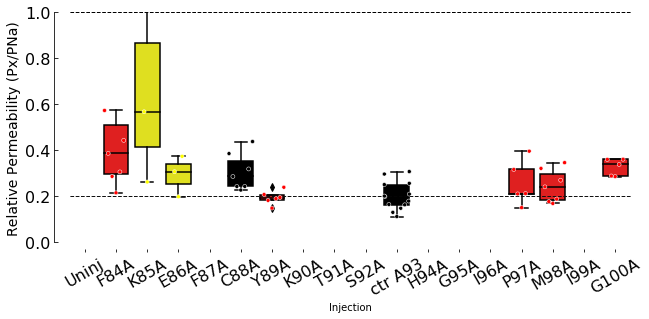

In [57]:
fig = plt.figure(figsize=(12, 4.5)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(1,1,1)


orderCons = UninjAndAlanin #["uninjected","mg419mg012","mg738mg012","mg739mg012","mg740mg012","mg741mg012","mg748mg012","mg759mg012","mg745mg012","mg752mg012","mg749mg012","mg750mg012","mg746mg012","mg747mg012", "mg760mg012","mg753mg012","mg761mg012","mg751mg012"]

labels2 = ['Uninj']
for i in range(0,len(LabelAlanin)):
    #labels2.append('')
    labels2.append(LabelAlanin[i])
sns.swarmplot(x= Potassium['Injection'], y=Potassium['Permeability'], data = Potassium,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, ax = ax1, size = 4,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(x= Potassium['Injection'], y=Potassium['Permeability'], data = Potassium, palette=sns.color_palette(colors),ax=ax1,order=orderCons)


#sns.swarmplot(y=Datamg418['PCs/Na-DT1d'], data = Datamg418,palette=sns.color_palette(colorsSINGLES), edgecolor='white', linewidth=0.5, size = 4)


YlimitPerm = [0,1]

##### AXIS 1 ####
ax1.set_ylim(YlimitPerm)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)  # no spine at the top
ax1.spines['bottom'].set_visible(False)  
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,50], [1,1] , 'k--', color='#000000', linewidth=1) #gray line for Zero or 1       
ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1     
ax1.tick_params(axis='both', which='major', labelsize=16)  
#ax1.set_title('lithium',size=10) 
ax1.yaxis.label.set_size(20)
ax1.set_ylabel('Relative Permeability (Px/PNa)', fontsize=14)

#ax1.xaxis.set_visible(False)
ax1.set_xticklabels(labels2,rotation=30)



plt.gcf().subplots_adjust(bottom=0.17, left=0.25,right=None, top=None,hspace=0.75, wspace=0.2) 

plt.savefig(filedirExportFig+"PermeabilityNtermAlanin"+'.pdf')




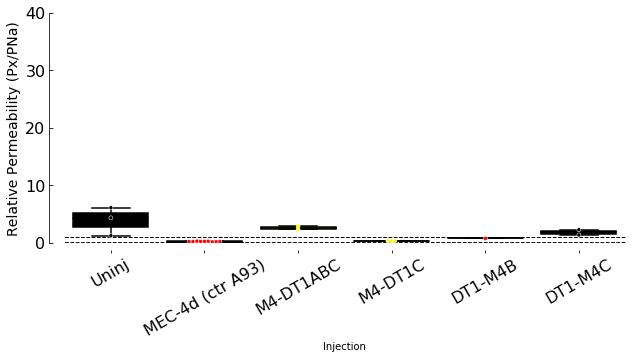

In [58]:
fig = plt.figure(figsize=(12, 4.5)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(1,1,1)


orderCons = UninjAndChimera#["uninjected","mg419mg012","mg738mg012","mg739mg012","mg740mg012","mg741mg012","mg748mg012","mg759mg012","mg745mg012","mg752mg012","mg749mg012","mg750mg012","mg746mg012","mg747mg012", "mg760mg012","mg753mg012","mg761mg012","mg751mg012"]


labels2 = ['Uninj','MEC-4d (ctr A93)']
for i in range(0,len(LabelChimera)):
    #labels2.append('')
    labels2.append(LabelChimera[i])

sns.swarmplot(x= PotassiumChimera['Injection'], y=PotassiumChimera['Permeability'], data = PotassiumChimera,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, ax = ax1, size = 4,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(x= PotassiumChimera['Injection'], y=PotassiumChimera['Permeability'], data = PotassiumChimera, palette=sns.color_palette(colors),ax=ax1,order=orderCons)


#sns.swarmplot(y=Datamg418['PCs/Na-DT1d'], data = Datamg418,palette=sns.color_palette(colorsSINGLES), edgecolor='white', linewidth=0.5, size = 4)


YlimitPerm = [0,40]

##### AXIS 1 ####
ax1.set_ylim(YlimitPerm)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)  # no spine at the top
ax1.spines['bottom'].set_visible(False)  
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,50], [1,1] , 'k--', color='#000000', linewidth=1) #gray line for Zero or 1       
ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1     
ax1.tick_params(axis='both', which='major', labelsize=16)  
#ax1.set_title('lithium',size=10) 
ax1.yaxis.label.set_size(20)
ax1.set_ylabel('Relative Permeability (Px/PNa)', fontsize=14)

#ax1.xaxis.set_visible(False)
ax1.set_xticklabels(labels2,rotation=30)



plt.gcf().subplots_adjust(bottom=0.17, left=0.25,right=None, top=None,hspace=0.75, wspace=0.2) 

plt.savefig(filedirExportFig+"PermeabilityNtermAlanin"+'.pdf')


